In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
rc('font', size=11)

In [2]:
from pytrends.request import TrendReq
pytrend = TrendReq()

Get the Google Trends search Interest in a couple of recipes which could be considered comparable between higher (beef) and lower (vegetarian) climate impact.

In [3]:
pytrend.build_payload(kw_list=['vegetarian chilli recipe', 'beef chilli recipe'])

In [4]:
df = pytrend.interest_over_time()

Define a baseline period to get the mean Interest over that time.

In [5]:
baseline_period = (df.index < '2020-01-01')
veg_baseline_mean = np.mean(df[baseline_period]['vegetarian chilli recipe'])
beef_baseline_mean = np.mean(df[baseline_period]['beef chilli recipe'])

Plot the search Interest over time, along with some lockdown dates.

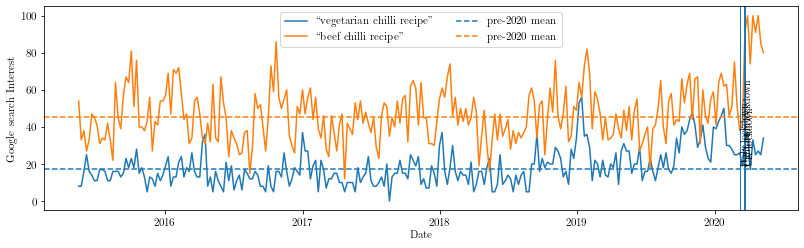

In [6]:
plt.figure(1, figsize=(3*4.5, 3.75))
plt.plot(df['vegetarian chilli recipe'], label='``vegetarian chilli recipe\"')
plt.plot(df['beef chilli recipe'], label='``beef chilli recipe\"')
plt.axhline(veg_baseline_mean, color='C0', linestyle='dashed', label='pre-2020 mean')
plt.axhline(beef_baseline_mean, color='C1', linestyle='dashed', label='pre-2020 mean')
plt.legend(ncol=2)
plt.axvline(np.datetime64('2020-03-23'),lw=1)
plt.text(np.datetime64('2020-03-23'), 20, 'UK lockdown', rotation=90, fontsize=10)
plt.axvline(np.datetime64('2020-03-09'), lw=1)
plt.text(np.datetime64('2020-03-09'), 20, 'Italy lockdown', rotation=90, fontsize=10)
plt.axvline(np.datetime64('2020-03-19'), lw=1)
plt.text(np.datetime64('2020-03-19'), 20, 'California lockdown', rotation=90, fontsize=10)
plt.xlabel('Date')
plt.ylabel('Google search Interest')
plt.savefig('./plots/chilli-interest.png', dpi=300, bbox_inches='tight')

There seems to be a noticeable uptick in search interest from about the middle of 2019 onwards. If we assume this is not related to Covid-19 then we should probably recalibrate out baseline to this period and try again.

In [7]:
baseline_period = (df.index < '2020-01-01')*(df.index > '2019-06-01')
veg_baseline_mean = np.mean(df[baseline_period]['vegetarian chilli recipe'])
beef_baseline_mean = np.mean(df[baseline_period]['beef chilli recipe'])

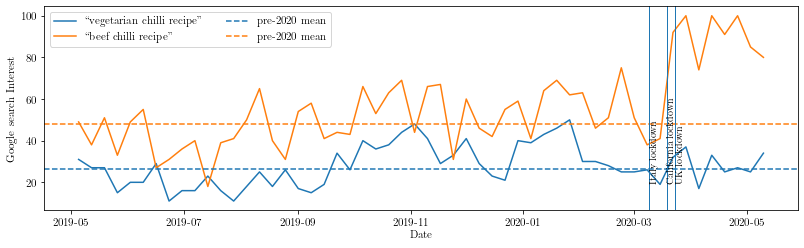

In [8]:
plt.figure(1, figsize=(3*4.5, 3.75))
plt.plot(df[df.index > '2019-05-01']['vegetarian chilli recipe'], label='``vegetarian chilli recipe\"')
plt.plot(df[df.index > '2019-05-01']['beef chilli recipe'], label='``beef chilli recipe\"')
plt.axhline(veg_baseline_mean, color='C0', linestyle='dashed', label='pre-2020 mean')
plt.axhline(beef_baseline_mean, color='C1', linestyle='dashed', label='pre-2020 mean')
plt.legend(ncol=2)
plt.axvline(np.datetime64('2020-03-23'),lw=1)
plt.text(np.datetime64('2020-03-23'), 20, 'UK lockdown', rotation=90, fontsize=10)
plt.axvline(np.datetime64('2020-03-09'), lw=1)
plt.text(np.datetime64('2020-03-09'), 20, 'Italy lockdown', rotation=90, fontsize=10)
plt.axvline(np.datetime64('2020-03-19'), lw=1)
plt.text(np.datetime64('2020-03-19'), 20, 'California lockdown', rotation=90, fontsize=10)
plt.xlabel('Date')
plt.ylabel('Google search Interest')
plt.savefig('./plots/chilli-interest-short-baseline.png', dpi=300, bbox_inches='tight')

I'm suspicious about how "Interest" is normalised for two quantities in the same query, so lets try that again with separete queries. 

In [9]:
veg_trend = TrendReq()
beef_trend = TrendReq()

veg_trend.build_payload(kw_list=['vegetarian chilli recipe'])
beef_trend.build_payload(kw_list=['beef chilli recipe'])

In [10]:
veg_df = veg_trend.interest_over_time()
beef_df = beef_trend.interest_over_time()

In [11]:
baseline_period = (veg_df.index < '2020-01-01')*(veg_df.index > '2019-06-01')
veg_baseline_mean = np.mean(veg_df[baseline_period]['vegetarian chilli recipe'])
beef_baseline_mean = np.mean(beef_df[baseline_period]['beef chilli recipe'])

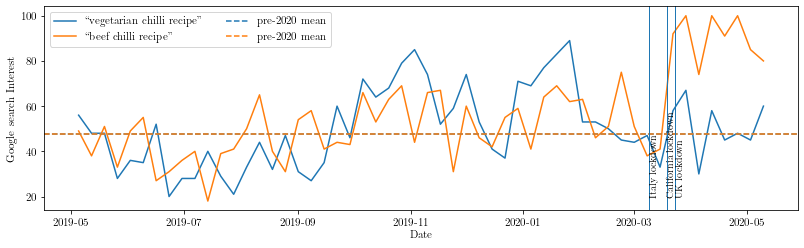

In [12]:
plt.figure(1, figsize=(3*4.5, 3.75))
plt.plot(veg_df[veg_df.index > '2019-05-01']['vegetarian chilli recipe'], label='``vegetarian chilli recipe\"')
plt.plot(beef_df[beef_df.index > '2019-05-01']['beef chilli recipe'], label='``beef chilli recipe\"')
plt.axhline(veg_baseline_mean, color='C0', linestyle='dashed', label='pre-2020 mean')
plt.axhline(beef_baseline_mean, color='C1', linestyle='dashed', label='pre-2020 mean')
plt.legend(ncol=2)
plt.axvline(np.datetime64('2020-03-23'),lw=1)
plt.text(np.datetime64('2020-03-23'), 20, 'UK lockdown', rotation=90, fontsize=10)
plt.axvline(np.datetime64('2020-03-09'), lw=1)
plt.text(np.datetime64('2020-03-09'), 20, 'Italy lockdown', rotation=90, fontsize=10)
plt.axvline(np.datetime64('2020-03-19'), lw=1)
plt.text(np.datetime64('2020-03-19'), 20, 'California lockdown', rotation=90, fontsize=10)
plt.xlabel('Date')
plt.ylabel('Google search Interest')
plt.savefig('./plots/chilli-interest-short-baseline-sepqueries.png', dpi=300, bbox_inches='tight')